In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Loading the dataset

In [12]:
df = pd.read_csv("carclaims.csv")

print(df.head())


  Month  WeekOfMonth  DayOfWeek    Make AccidentArea DayOfWeekClaimed  \
0   Dec            5  Wednesday   Honda        Urban          Tuesday   
1   Jan            3  Wednesday   Honda        Urban           Monday   
2   Oct            5     Friday   Honda        Urban         Thursday   
3   Jun            2   Saturday  Toyota        Rural           Friday   
4   Jan            5     Monday   Honda        Urban          Tuesday   

  MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  \
0          Jan                   1  Female        Single  ...   
1          Jan                   4    Male        Single  ...   
2          Nov                   2    Male       Married  ...   
3          Jul                   1    Male       Married  ...   
4          Feb                   2  Female        Single  ...   

   AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
0           26 to 30                No             No  External   
1           31 to 35               Y

# Handling missing values

In [13]:
# 1. Handling Missing Values
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

df.dropna(inplace=True)

duplicate_rows = df.duplicated().sum()
print("Duplicate rows:", duplicate_rows)

# If there are duplicate rows, remove them
df.drop_duplicates(inplace=True)
print(f"This dataframe contain missing values = {df.isnull().sum().sum()}")
df.duplicated().sum()


Missing values:
 Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days:Policy-Accident    0
Days:Policy-Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange-Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
FraudFound              0
dtype: int64
Duplicate rows: 0
This dataframe contain missing values = 0


0

# EDA

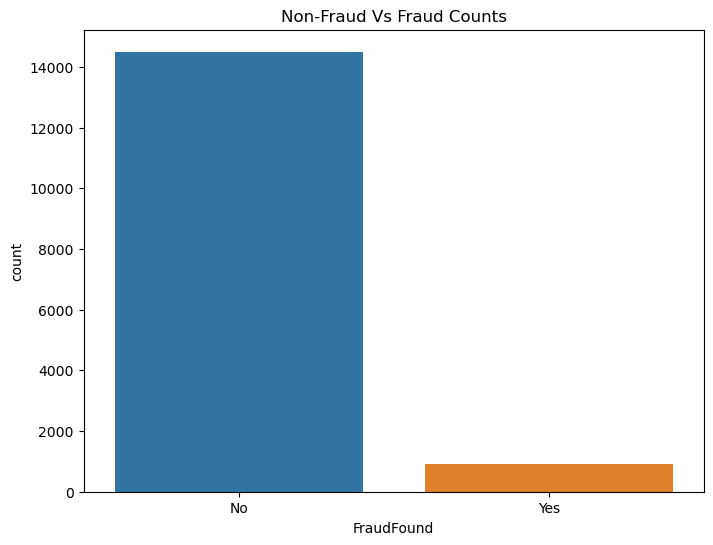

C:\Users\amukd\AppData\Local\Temp\ipykernel_15300\3305957394.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


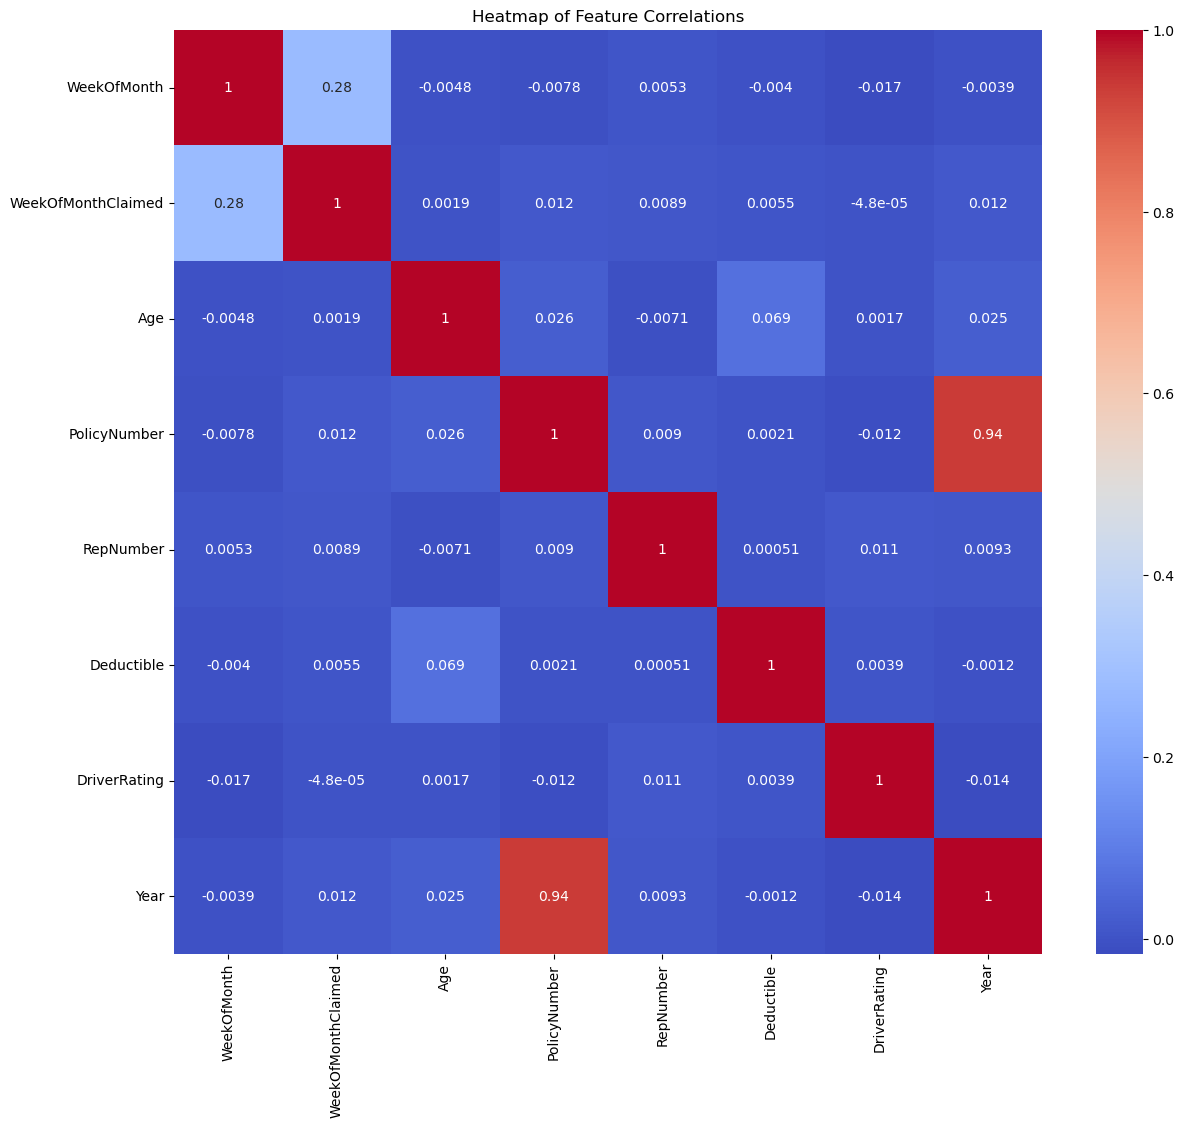

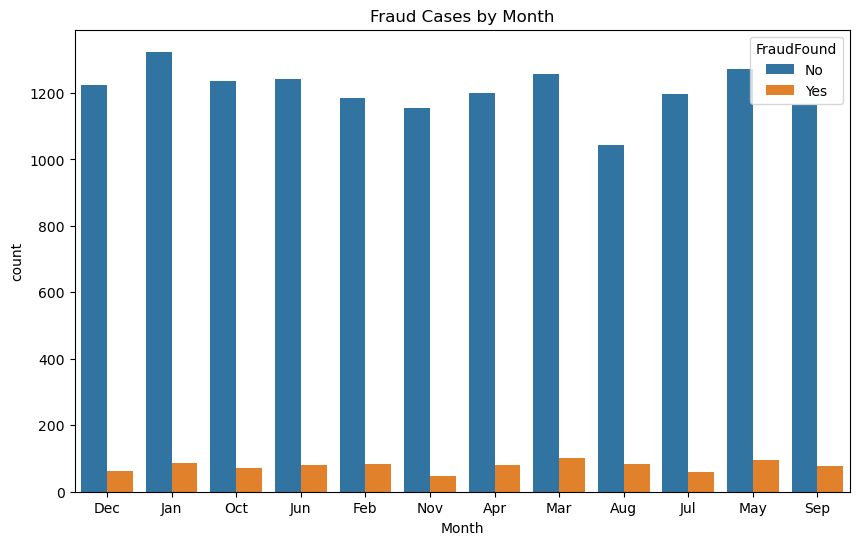

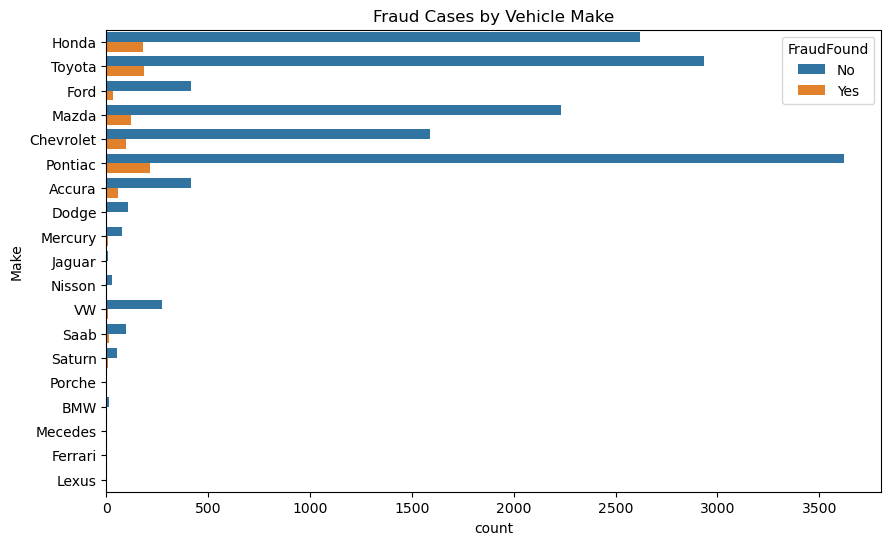

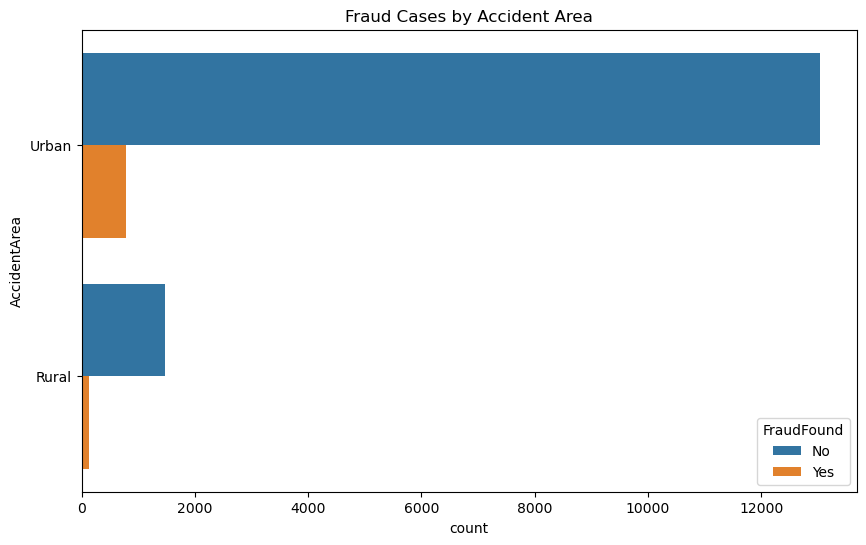

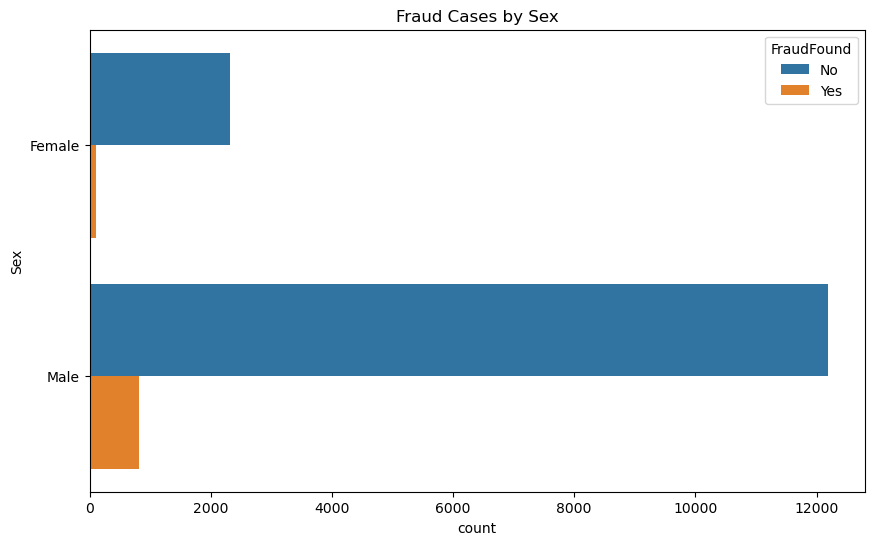

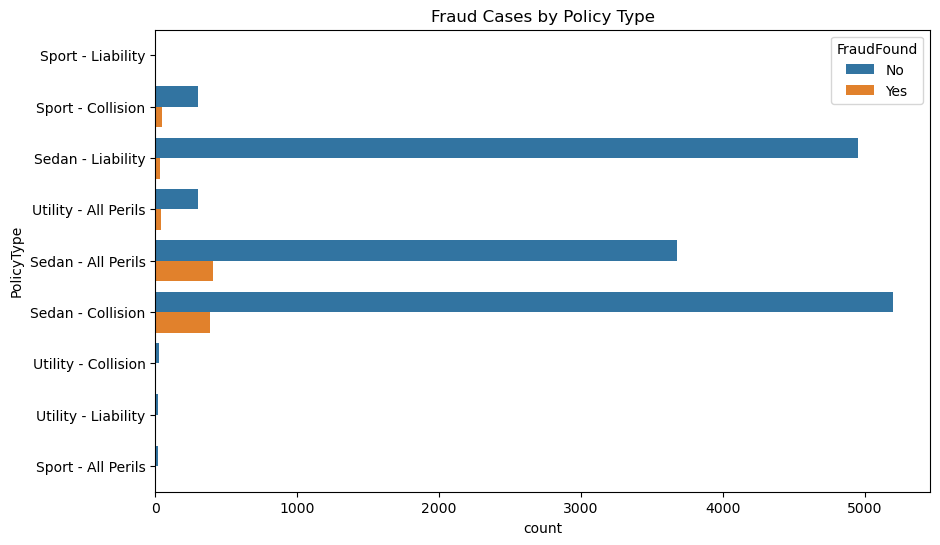

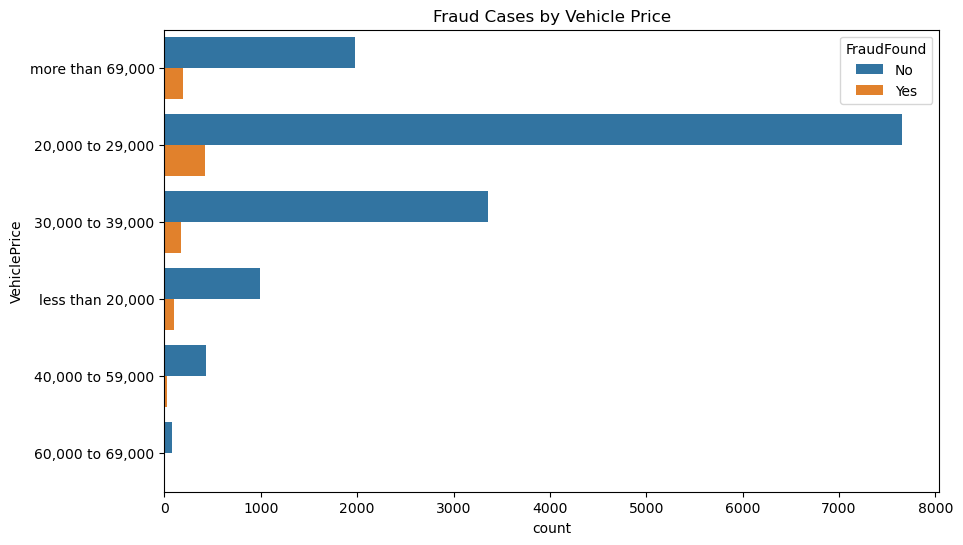

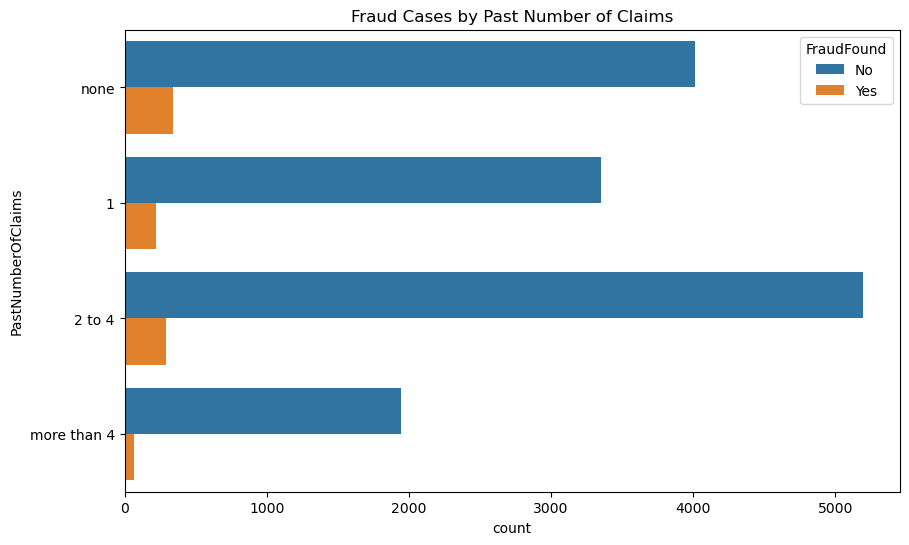

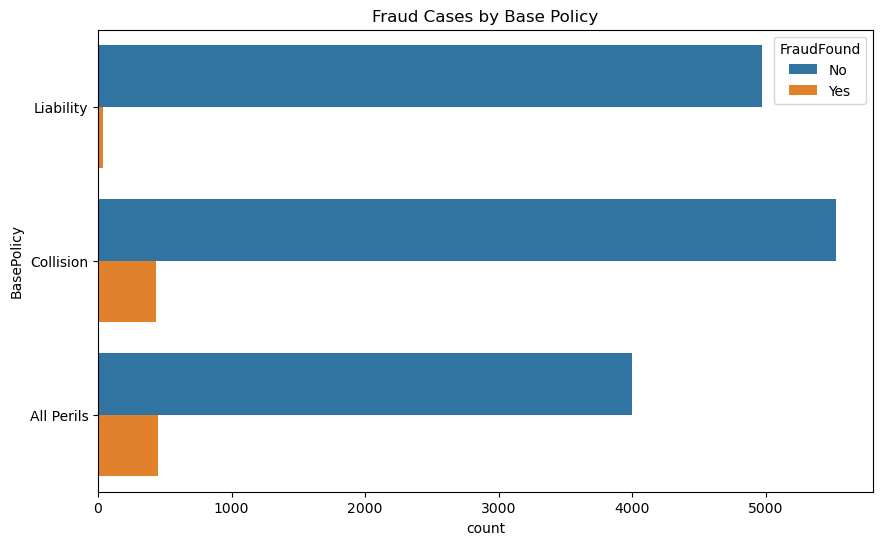

In [14]:
# Plot 1: Non-Fraud Vs Fraud Counts
plt.figure(figsize=(8, 6))
sns.countplot(x='FraudFound', data=df)
plt.title("Non-Fraud Vs Fraud Counts")
plt.show()

# Plot 2: Heatmap of Correlations
plt.figure(figsize=(14, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap of Feature Correlations")
plt.show()

# Plot 3: Month vs FraudFound
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Month', hue='FraudFound')
plt.title("Fraud Cases by Month")
plt.show()

# Plot 4: Make vs FraudFound
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Make', hue='FraudFound')
plt.title("Fraud Cases by Vehicle Make")
plt.show()

# Plot 5: AccidentArea vs FraudFound
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='AccidentArea', hue='FraudFound')
plt.title("Fraud Cases by Accident Area")
plt.show()

# Plot 6: Sex vs FraudFound
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Sex', hue='FraudFound')
plt.title("Fraud Cases by Sex")
plt.show()

# Plot 7: PolicyType vs FraudFound
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='PolicyType', hue='FraudFound')
plt.title("Fraud Cases by Policy Type")
plt.show()

# Plot 8: VehiclePrice vs FraudFound
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='VehiclePrice', hue='FraudFound')
plt.title("Fraud Cases by Vehicle Price")
plt.show()

# Plot 9: PastNumberOfClaims vs FraudFound
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='PastNumberOfClaims', hue='FraudFound')
plt.title("Fraud Cases by Past Number of Claims")
plt.show()

# Plot 10: BasePolicy vs FraudFound
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='BasePolicy', hue='FraudFound')
plt.title("Fraud Cases by Base Policy")
plt.show()


# Preprocessing

In [15]:
df.columns
#check 2 columns that contain the same values
df[['AgeOfPolicyHolder','Age']]
#Contained the same values again
df[['BasePolicy', 'PolicyType']]
#make list that contained name of unwated columns or redundancy columns
unwanted_features = ['PolicyNumber', 'AgeOfPolicyHolder', 'BasePolicy', 'VehicleCategory']
#drop unwanted columns
df_new = df.drop(unwanted_features, axis=1)
df_drop = df_new.copy()

In [16]:
#One hot encoding

In [17]:
df_onehot = df_new.copy()
#collected name of Categorical features
categorical_fetures = [x for x in df_onehot.columns if df_onehot[x].dtype != "int64"]
#Then remove Labels from list
categorical_fetures.remove('FraudFound')
categorical_fetures
#change type from Obj to categorical
for cat in categorical_fetures:
  dummies = pd.get_dummies(df[cat])
  df_onehot = pd.concat([df_onehot, dummies], axis=1) 
  df_onehot.drop(cat, axis=1, inplace=True)
df_onehot

,WeekOfMonth,WeekOfMonthClaimed,Age,RepNumber,Deductible,DriverRating,Year,FraudFound,Apr,Aug,...,1 year,2 to 3 years,4 to 8 years,no change,under 6 months,1 vehicle,2 vehicles,3 to 4,5 to 8,more than 8
0,5,1,21,12,300,1,1994,No,0,0,...,1,0,0,0,0,0,0,1,0,0
1,3,4,34,15,400,4,1994,No,0,0,...,0,0,0,1,0,1,0,0,0,0
2,5,2,47,7,400,3,1994,No,0,0,...,0,0,0,1,0,1,0,0,0,0
3,2,1,65,4,400,2,1994,No,0,0,...,0,0,0,1,0,1,0,0,0,0
4,5,2,27,3,400,1,1994,No,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,4,5,35,5,400,4,1996,Yes,0,0,...,0,0,0,1,0,1,0,0,0,0
15416,5,1,30,11,400,3,1996,No,0,0,...,0,0,0,1,0,0,0,1,0,0
15417,5,1,24,4,400,4,1996,Yes,0,0,...,0,0,0,1,0,1,0,0,0,0
15418,1,2,34,6,400,4,1996,No,0,0,...,0,0,0,1,0,1,0,0,0,0


In [18]:
#replace str label with numerical label
df_onehot['FraudFound'].replace({"No":0,"Yes":1}, inplace=True)
df_onehot['FraudFound'].unique()
y_onehot = df_onehot[['FraudFound']]
X_onehot = df_onehot.drop('FraudFound', axis=1)
y_onehot['FraudFound'].apply(lambda x: 0 if x=="No" else 1)
df_drop.columns
df_drop['Month'].unique()
df_drop['Make'].unique()
df_drop['AccidentArea'].unique()
df_drop['Sex'].unique()
df_drop['MaritalStatus'].unique()
df_drop['Fault'].unique()
df_drop['PolicyType'].unique()
df_drop['VehiclePrice'].unique()
df_drop['Days:Policy-Accident'].unique()
df_drop['Days:Policy-Claim'].unique()
df_drop['PastNumberOfClaims'].unique()
df_drop['AgeOfVehicle'].unique()
df_drop['PoliceReportFiled'].unique()
df_drop['WitnessPresent'].unique()
df_drop['AgentType'].unique()
df_drop['NumberOfSuppliments'].unique()
df_drop['AddressChange-Claim'].unique()
df_drop['NumberOfCars'].unique()
cath_features = []
for name in df_drop.columns:
  if df_drop[name].dtype != "int64":
    cath_features.append(name)
cath_features
#Creat Dictionary
Month = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
DayOfWeek = {'Sunday':1,'Monday':2,'Tuesday':3,'Wednesday':4,'Thursday':5,'Friday':6,'Saturday':7}
Make = {'Honda':1, 'Toyota':2, 'Ford':3, 'Mazda':4, 'Chevrolet':5, 'Pontiac':6,
       'Accura':7, 'Dodge':8, 'Mercury':9, 'Jaguar':10, 'Nisson':11, 'VW':12, 'Saab':13,
       'Saturn':14, 'Porche':15, 'BMW':16, 'Mecedes':17, 'Ferrari':18, 'Lexus':19}
AccidentArea = {'Urban' : 0, "Rural": 1}
Sex = {'Female' : 0, "Male": 1}
MaritalStatus = {'Single':1,'Married':2,'Widow':3, 'Divorced':4}
Fault = {'Policy Holder':0, "Third Party":1}
PolicyType = {'Sport - Liability':0, 'Sport - Collision':1, 'Sedan - Liability':2,
       'Utility - All Perils':3, 'Sedan - All Perils':4, 'Sedan - Collision':5,
       'Utility - Collision':6, 'Utility - Liability':7, 'Sport - All Perils':8}
VehiclePrice = {'more than 69,000':0, '20,000 to 29,000':1, '30,000 to 39,000':2,
       'less than 20,000':3, '40,000 to 59,000':4, '60,000 to 69,000':5}
Days_Policy_Accident = {'more than 30':2, '15 to 30':1, 'none':0, '1 to 7':3, '8 to 15':4}
Days_Policy_Claim = {'more than 30':2, '15 to 30':1, '8 to 15':3, 'none':0}
PastNumberOfClaims = {'none':0, '1':1, '2 to 4':2, 'more than 4':3}
AgeOfVehicle = {'3 years':2, '6 years':5, '7 years':6, 'more than 7':7, '5 years':4, 'new':0,
       '4 years':3, '2 years':1}
PoliceReportFiled = {'No':0, "Yes":1}
WitnessPresent = {'No':0, "Yes":1}
AgentType = {'External':0, 'Internal':1}
NumberOfSuppliments = {'none':0, 'more than 5':3, '3 to 5':2, '1 to 2':1}
AddressChange_Claim = {'1 year':2, 'no change':0, '4 to 8 years':4, '2 to 3 years':3,
       'under 6 months':1}
NumberOfCars = {'3 to 4':2, '1 vehicle' :0, '2 vehicles':1, '5 to 8':3, 'more than 8':4}
FraudFound = {'No':0, "Yes":1}
#replace with Dcitionary
df_drop['Month'].replace(Month, inplace =True)
df_drop['MonthClaimed'].replace(Month, inplace =True)
df_drop['DayOfWeekClaimed'].replace(DayOfWeek, inplace =True)
df_drop['DayOfWeek'].replace(DayOfWeek, inplace =True)
df_drop['Make'].replace(Make, inplace =True)
df_drop['AccidentArea'].replace(AccidentArea, inplace =True)
df_drop['Sex'].replace(Sex, inplace =True)
df_drop['MaritalStatus'].replace(MaritalStatus, inplace =True)
df_drop['Fault'].replace(Fault, inplace =True)
df_drop['PolicyType'].replace(PolicyType, inplace =True)
df_drop['VehiclePrice'].replace(VehiclePrice, inplace =True)
df_drop['Days:Policy-Accident'].replace(Days_Policy_Accident, inplace =True)
df_drop['Days:Policy-Claim'].replace(Days_Policy_Claim, inplace =True)
df_drop['PastNumberOfClaims'].replace(PastNumberOfClaims, inplace =True)
df_drop['AgeOfVehicle'].replace(AgeOfVehicle, inplace =True)
df_drop['PoliceReportFiled'].replace(PoliceReportFiled, inplace =True)
df_drop['WitnessPresent'].replace(WitnessPresent, inplace =True)
df_drop['AgentType'].replace(AgentType, inplace =True)
df_drop['NumberOfSuppliments'].replace(NumberOfSuppliments, inplace =True)
df_drop['AddressChange-Claim'].replace(AddressChange_Claim, inplace =True)
df_drop['NumberOfCars'].replace(NumberOfCars, inplace =True)
df_drop['FraudFound'].replace(FraudFound, inplace =True)
df_drop.info()
df_drop['DayOfWeekClaimed'].astype(int)
df_drop['MonthClaimed'].astype(int)
df_drop.info()
#feature engineering
df_1994 = df[df['Year']==1994]
test = df.copy()
test.columns
test[['WeekOfMonth','Month','DayOfWeek','DayOfWeekClaimed','MonthClaimed','WeekOfMonthClaimed','Year']]
from datetime import datetime
month_acc = list(test['Month'])
len(month_acc)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15420 entries, 0 to 15419
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  int64 
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  int64 
 3   Make                  15420 non-null  int64 
 4   AccidentArea          15420 non-null  int64 
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  int64 
 9   MaritalStatus         15420 non-null  int64 
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  int64 
 12  PolicyType            15420 non-null  int64 
 13  VehiclePrice          15420 non-null  int64 
 14  RepNumber             15420 non-null  int64 
 15  Deductible            15420 non-null

15420

C:\Users\amukd\AppData\Local\Temp\ipykernel_15300\2962539737.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_drop.corr()


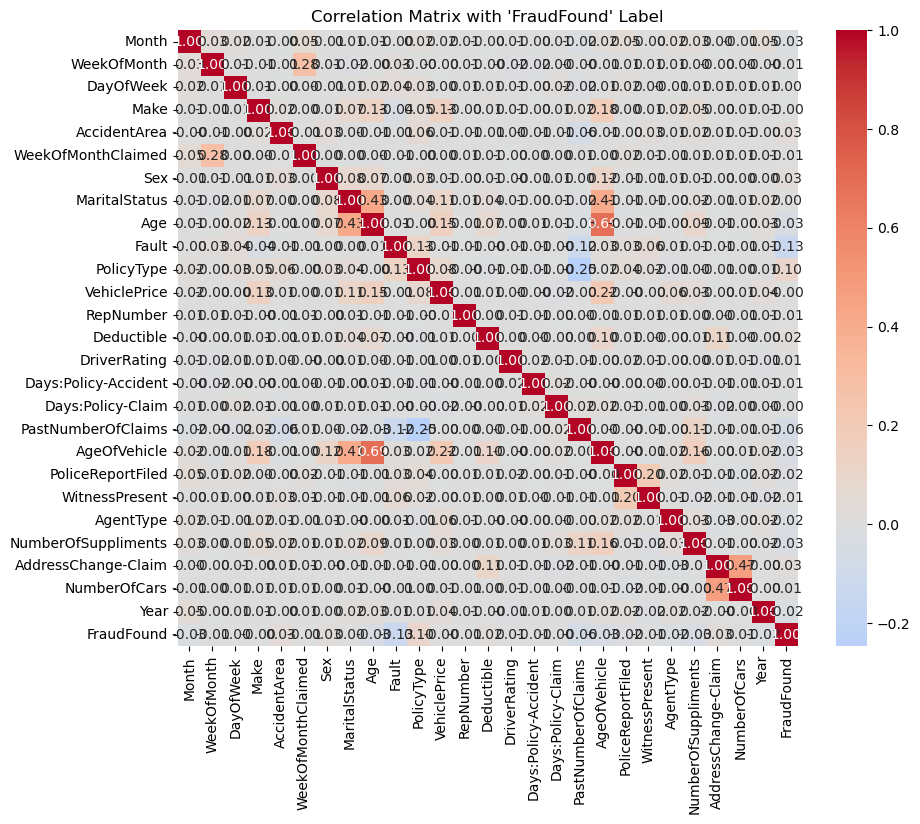

Shape after feature selection: (15420, 13)
Selected features: ['Month', 'AccidentArea', 'Sex', 'Age', 'Fault', 'PolicyType', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgentType', 'NumberOfSuppliments', 'AddressChange-Claim', 'Year', 'FraudFound']


In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix for all columns
correlation_matrix = df_drop.corr()

# Plot the correlation matrix with emphasis on 'FraudFound' correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation Matrix with 'FraudFound' Label")
plt.show()

# Filter columns that have an absolute correlation of at least 0.2 with 'FraudFound'
target_col = 'FraudFound'
high_corr_features = correlation_matrix.index[correlation_matrix[target_col].abs() >= 0.02].tolist()

# Drop columns with correlation less than 0.2 with 'FraudFound'
df_selected = df_drop[high_corr_features]

# Display the new shape and remaining columns
print("Shape after feature selection:", df_selected.shape)
print("Selected features:", df_selected.columns.tolist())


In [26]:
# Drop the target label column 'FraudFound' from the selected DataFrame
df_final = df_selected.drop(columns=['FraudFound'])

# Display the final shape and columns
print("Shape after dropping label column:", df_final.shape)
print("Final features for clustering:", df_final.columns.tolist())


Shape after dropping label column: (15420, 12)
Final features for clustering: ['Month', 'AccidentArea', 'Sex', 'Age', 'Fault', 'PolicyType', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgentType', 'NumberOfSuppliments', 'AddressChange-Claim', 'Year']


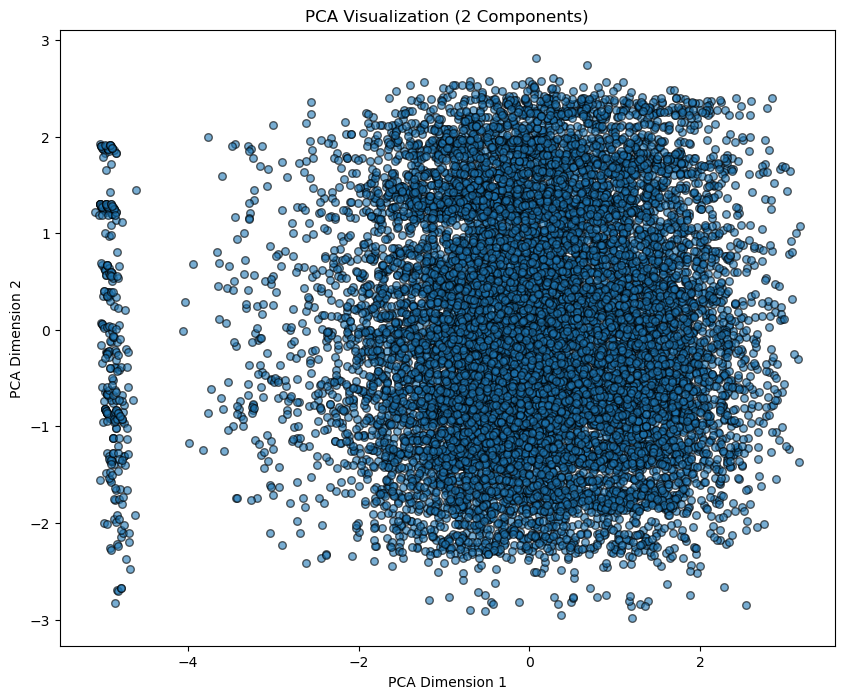

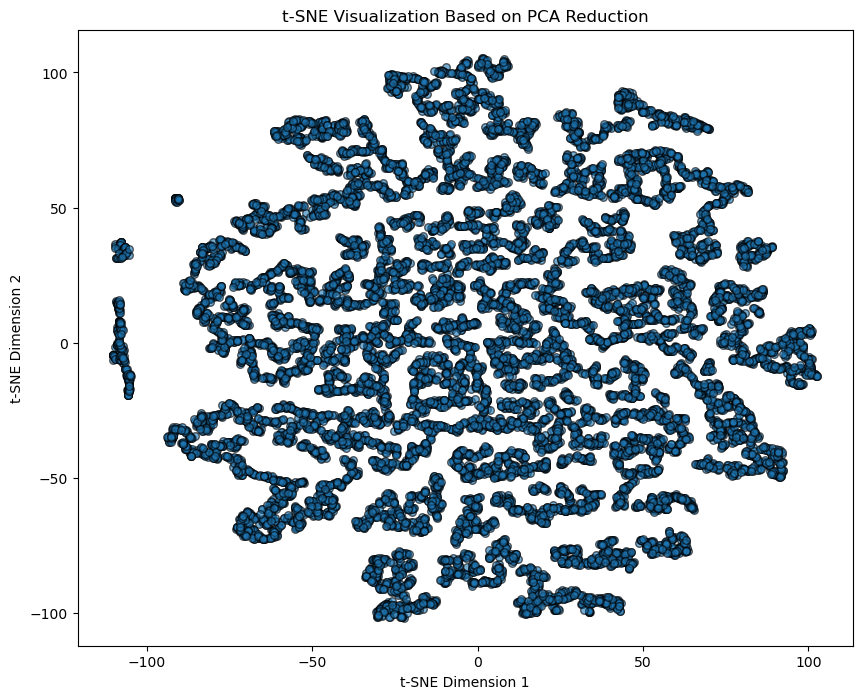

In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_final)

# Apply PCA to reduce dimensions directly to 2
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Plot the PCA results
plt.figure(figsize=(10, 8))
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.6, s=30, edgecolor='k')
plt.title("PCA Visualization (2 Components)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.show()

# Optionally, you can still use t-SNE for further separation in a 2D space if desired:
tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(df_pca)

# Plot the t-SNE results
plt.figure(figsize=(10, 8))
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], alpha=0.6, s=30, edgecolor='k')
plt.title("t-SNE Visualization Based on PCA Reduction")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()


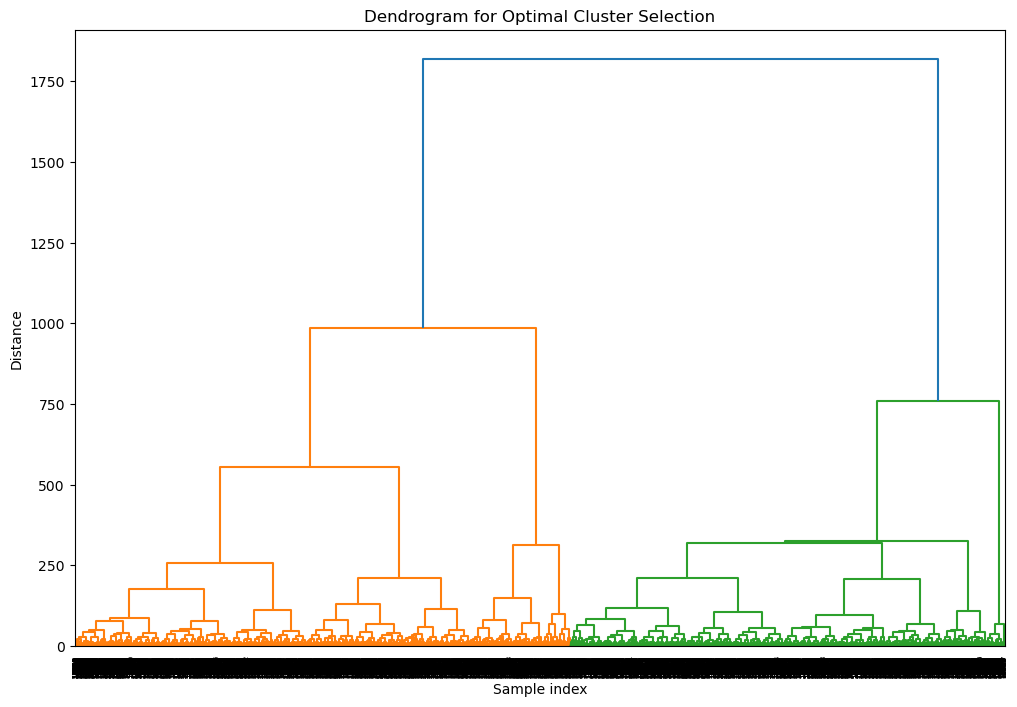

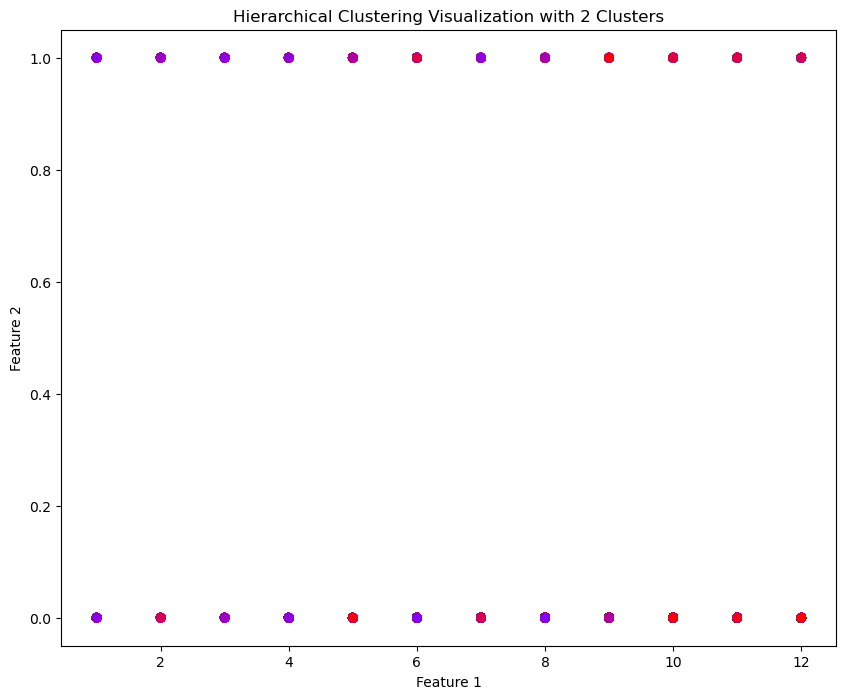

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming df_final contains the features used for clustering

# Perform hierarchical clustering using the 'ward' method
linked = linkage(df_final, method='ward')

# Optionally, plot the dendrogram to visualize
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Dendrogram for Optimal Cluster Selection")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

# Let's say from the dendrogram, we decided on 3 clusters
n_clusters = 2

# Apply Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
df_final['Cluster'] = hierarchical.fit_predict(df_final)

# Plotting the clusters
plt.figure(figsize=(10, 8))
plt.scatter(df_final.iloc[:, 0], df_final.iloc[:, 1], c=df_final['Cluster'], cmap='rainbow', alpha=0.6)
plt.title(f"Hierarchical Clustering Visualization with {n_clusters} Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


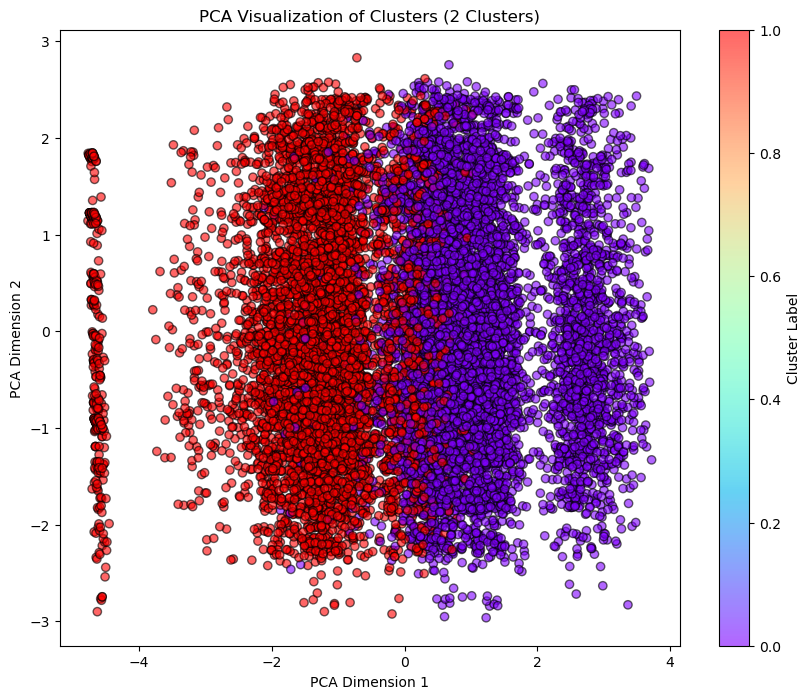

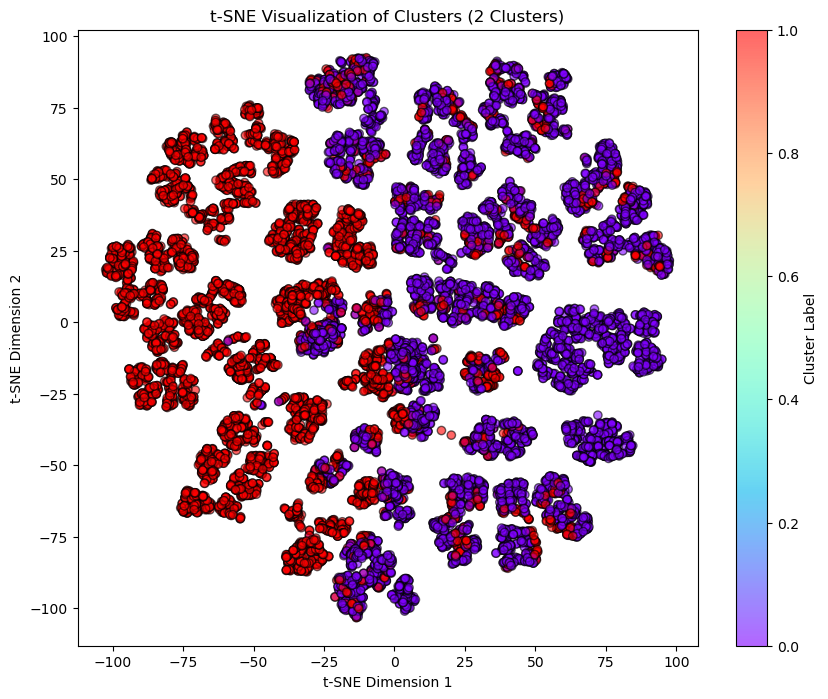

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming df_final contains the features used for clustering
# Standardizing the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_final)

# Apply Agglomerative Clustering
n_clusters = 2 # Change based on your dendrogram analysis
hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
df_final['Cluster'] = hierarchical.fit_predict(df_final)

# Step 2: Apply PCA to visualize the clusters
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Plot PCA results with clustering
plt.figure(figsize=(10, 8))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_final['Cluster'], cmap='rainbow', alpha=0.6, edgecolor='k')
plt.title(f"PCA Visualization of Clusters ({n_clusters} Clusters)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.colorbar(label='Cluster Label')
plt.show()

# Step 3: Apply t-SNE for further visualization
tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(df_scaled)

# Plot t-SNE results with clustering
plt.figure(figsize=(10, 8))
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=df_final['Cluster'], cmap='rainbow', alpha=0.6, edgecolor='k')
plt.title(f"t-SNE Visualization of Clusters ({n_clusters} Clusters)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.colorbar(label='Cluster Label')
plt.show()


C:\Users\amukd\AppData\Local\Temp\ipykernel_15300\2531449106.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mean_values = mean_values.append(mean_values.iloc[0])


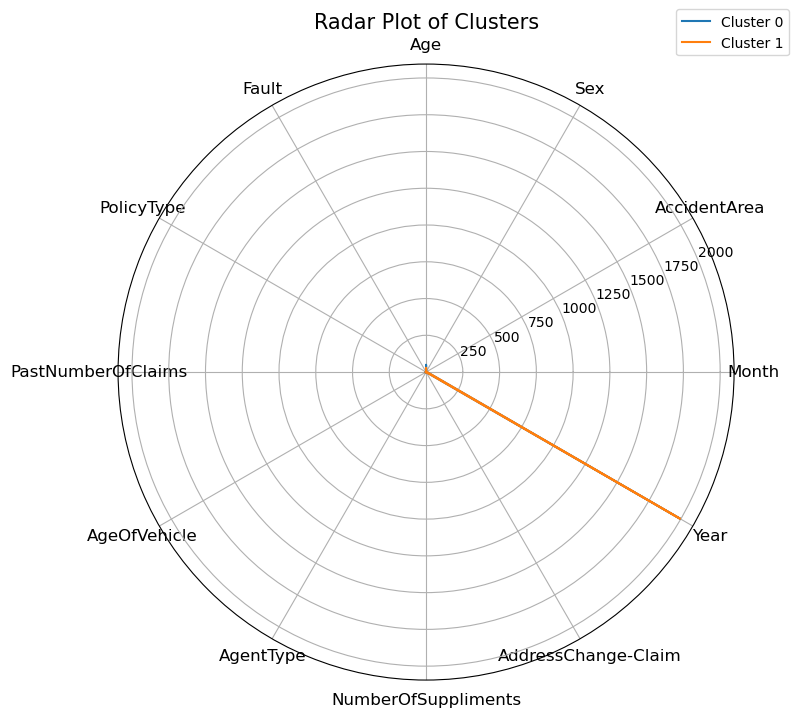

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df_final contains the features and the cluster labels
# Calculate the mean values for each cluster
mean_values = df_final.groupby('Cluster').mean()

# Number of features
num_features = mean_values.shape[1]

# Create a list of angles for the radar plot
angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()

# The radar plot needs to be closed, so we append the start to the end
mean_values = mean_values.append(mean_values.iloc[0])
angles += angles[:1]

# Create a radar plot for each cluster
plt.figure(figsize=(12, 8))
for i in range(mean_values.shape[0] - 1):  # Skip the last row which is the first cluster repeated
    values = mean_values.iloc[i].values.flatten().tolist()
    values += values[:1]  # Closing the loop for the radar plot
    plt.subplot(1, 1, 1, polar=True)
    plt.fill(angles, values, alpha=0.25)
    plt.plot(angles, values, label=f'Cluster {i}')

# Add labels and title
plt.xticks(angles[:-1], df_final.columns[:-1], fontsize=12)  # Adjust if needed
plt.title('Radar Plot of Clusters', size=15)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()


In [42]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Assuming df_final contains the features and 'Cluster' labels

# Extract the feature values (without the 'Cluster' column)
X = df_final.drop(columns=['Cluster'])
labels = df_final['Cluster']

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)

# Calculate Davies-Bouldin Score
davies_bouldin_avg = davies_bouldin_score(X, labels)
print("Davies-Bouldin Score:", davies_bouldin_avg)


Silhouette Score: 0.4406610012460688
Davies-Bouldin Score: 0.7792448087478058


# COMPARISON WITH K-MEANS

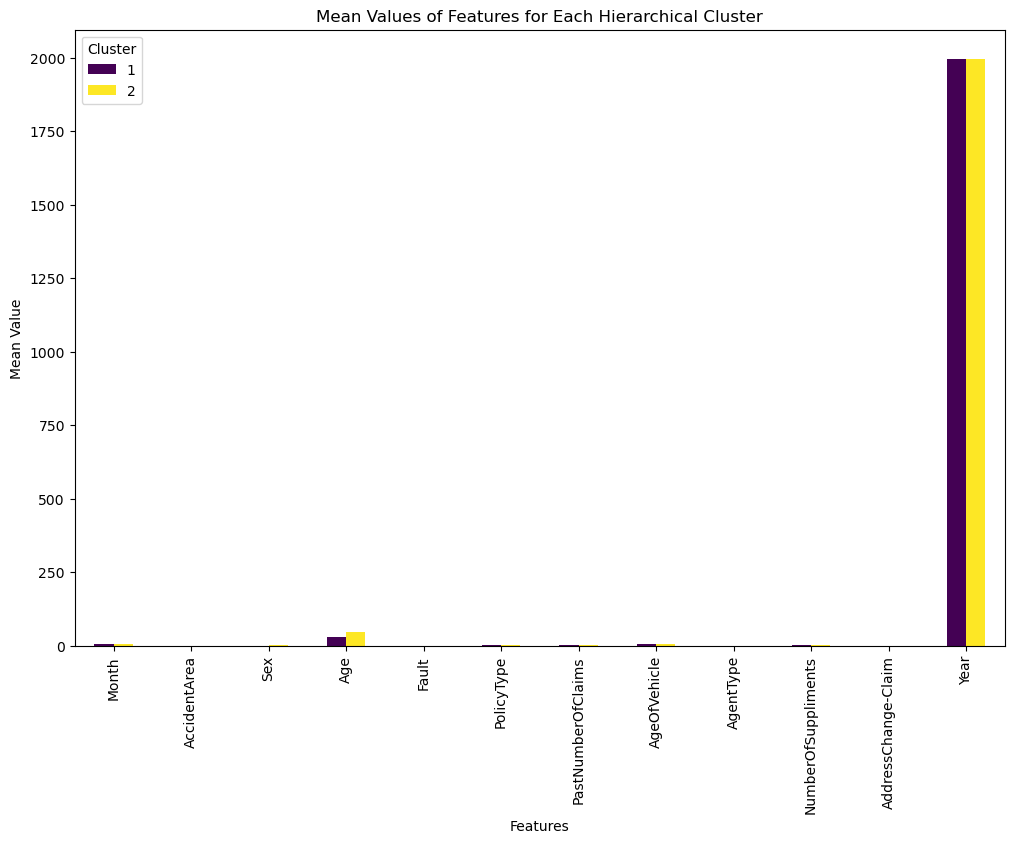

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster

# Assuming df_final is your preprocessed dataframe with features only (no target/label column)
# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_final)

# Perform hierarchical clustering
Z = linkage(df_scaled, method='ward')  # Using Ward's method for linkage
# Define the number of clusters (e.g., k=2) and get cluster labels
num_clusters = 2
df_final['Cluster'] = fcluster(Z, num_clusters, criterion='maxclust')

# Calculate mean values of each feature for each cluster
mean_values = df_final.groupby('Cluster').mean()

# Plot bar plots for each feature across clusters
mean_values.T.plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title("Mean Values of Features for Each Hierarchical Cluster")
plt.xlabel("Features")
plt.ylabel("Mean Value")
plt.legend(title="Cluster")
plt.show()
